In [1]:
import sys
import csv
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
sys.path.insert(0,'/Users/Lorena/ML_IPAM/IPAM2021_ML/algo/GPR/gpytorch')
from data_conditioning import *

[KeOps] Warning : omp.h header is not in the path, disabling OpenMP.
[KeOps] Warning : Cuda libraries were not detected on the system ; using cpu only mode


<stdin>:1:10: fatal error: 'omp.h' file not found
#include <omp.h>
         ^~~~~~~
1 error generated.


# Read training and testing data

In [3]:
_, ytrain = extract_data('/Users/Lorena/ML_IPAM/IPAM2021_ML/algo/GPR/gpytorch/notebooks/complete_ytrain.csv')
_, xtrain = extract_data('/Users/Lorena/ML_IPAM/IPAM2021_ML/algo/GPR/gpytorch/notebooks/complete_xtrain.csv')
_, ytest = extract_data('/Users/Lorena/ML_IPAM/IPAM2021_ML/algo/GPR/gpytorch/notebooks/complete_ytest.csv')
_, xtest = extract_data('/Users/Lorena/ML_IPAM/IPAM2021_ML/algo/GPR/gpytorch/notebooks/complete_xtest.csv')

In [4]:
print('The number of rows of training data is: ', len(ytrain))
print('The number of rows of testing data is: ', len(ytest))
test_percentage = round(len(ytest)/(len(ytrain)+len(ytest))*100)
print(f'The breakdown of training/testing data is {100-test_percentage}/{test_percentage}')

The number of rows of training data is:  142580
The number of rows of testing data is:  61107
The breakdown of training/testing data is 70/30


# Read predictions

In [5]:
_, predicted_data = extract_data('please_work.csv')

In [6]:
predicted_data = flip_mass_values(predicted_data)

# Define error functions to plot

Treat mass and spin data separately since zero spins cause a division problem. One could choose a very small spin, but for now I will keep it this way.

In [7]:
predicted_masses = predicted_data[:,:2] #first two columns are mass values
ytest_masses = ytest[:,:2]
xtest_masses = xtest[:,:2]
predicted_spins = predicted_data[:,2:] #last two columns are spin values
ytest_spins = ytest[:,2:]
xtest_spins = xtest[:,2:]

In [8]:
# Error definitions for predicted masses
abs_rel_err_M = np.abs((ytest_masses - predicted_masses)/ytest_masses)
rel_err_M = (ytest_masses - predicted_masses)/ytest_masses
abs_diff_M = np.abs(ytest_masses - predicted_masses)
diff_M = ytest_masses - predicted_masses

# Error definitions for recovered masses
rec_diff_M = ytest_masses - xtest_masses
rec_abs_diff_M = np.abs(ytest_masses - xtest_masses)
rec_rel_err_M = (ytest_masses - xtest_masses)/ytest_masses
rec_abs_rel_err_M = np.abs((ytest_masses - xtest_masses)/ytest_masses)

# Error definitions for predicted spins
abs_diff_S = np.abs(ytest_spins - predicted_spins)
diff_S = ytest_spins - predicted_spins

# Error definitions for recovered spins
rec_diff_S = ytest_spins - xtest_spins
rec_abs_diff_S = np.abs(ytest_spins - xtest_spins)

A bad R2 score does not necessarily mean that our model is wrong.

In [9]:
print("R2 score for predicted masses: %.2f" % r2_score(ytest_masses,predicted_masses))
print("Mean squared error for predicted masses: %.2f" % mean_squared_error(ytest_masses,predicted_masses))

print("R2 score for recovered masses: %.2f" % r2_score(ytest_masses,xtest_masses))
print("Mean squared error for recovered masses: %.2f" % mean_squared_error(ytest_masses,xtest_masses))

R2 score for predicted masses: 0.90
Mean squared error for predicted masses: 30.16
R2 score for recovered masses: 0.64
Mean squared error for recovered masses: 103.14


In [10]:
print("R2 score for predicted spins: %.2f" % r2_score(ytest_spins,predicted_spins))
print("Mean squared error for predicted spins: %.2f" % mean_squared_error(ytest_spins,predicted_spins))
     
print("R2 score for recovered spins: %.2f" % r2_score(ytest_spins,xtest_spins))
print("Mean squared error for recovered spins: %.2f" % mean_squared_error(ytest_spins,xtest_spins))

R2 score for predicted spins: 0.42
Mean squared error for predicted spins: 0.06
R2 score for recovered spins: -0.66
Mean squared error for recovered spins: 0.18


# Plotting

In [11]:
color_cycle = [
        (53/255.,  74/255.,  93/255.),   # black
        (59/255.,  153/255., 217/255.),  # blue
        (229/255., 126/255., 49/255.),   # orange
        (53/255.,  206/255., 116/255.),  # green
        (230/255., 78/255.,  67/255.),   # red
        (154/255., 91/255.,  179/255.),  # purple
        (240/255., 195/255., 48/255.),   # gold
        '#e377c2',                       # pink
        '#8c564b',                       # brown
        '#7f7f7f',                       # gray
        '#17becf',                       # teal
        '#bcbd22',                       # lime
    ]

In [12]:
bbh = np.where((ytest_masses[:,0]>=5) & (ytest_masses[:,1]>=5))
bns = np.where((ytest_masses[:,0]<5) & (ytest_masses[:,1]<5))
nsbh = np.where((ytest_masses[:,0]>=5) & (ytest_masses[:,1]<5))

In [13]:
bbh_m = ytest_masses[bbh,:]
bns_m = ytest_masses[bns,:]
nsbh_m = ytest_masses[nsbh,:]

bbh_s = ytest_spins[bbh,:]
bns_s = ytest_spins[bns,:]
nsbh_s = ytest_spins[nsbh,:]

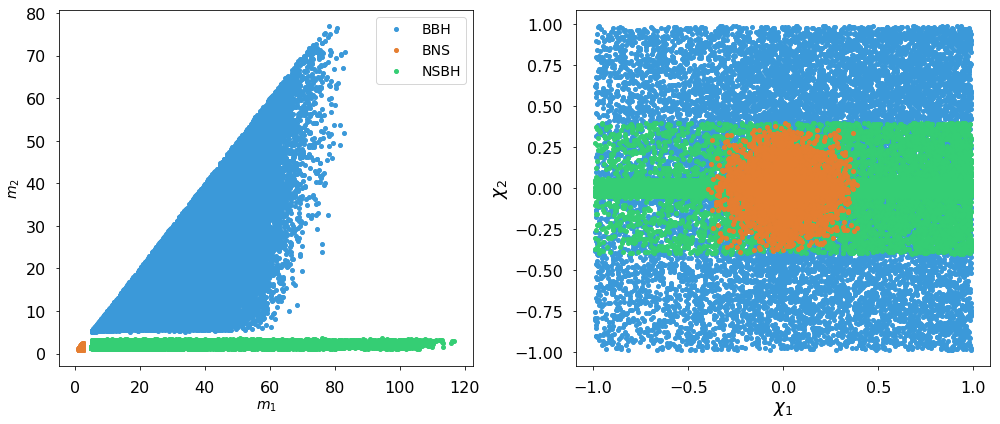

In [15]:
# Initialize plot
f, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].tick_params(axis='both', which='major', labelsize=16, pad=10)
ax[1].tick_params(axis='both', which='major', labelsize=16, pad=10)

ax[0].plot(bbh_m[0][:,0], bbh_m[0][:,1], 'o', markersize=4, color=color_cycle[1], zorder=-1, label='BBH')
ax[0].plot(bns_m[0][:,0], bns_m[0][:,1], 'o', markersize=4, color=color_cycle[2], label='BNS')
ax[0].plot(nsbh_m[0][:,0], nsbh_m[0][:,1], 'o', markersize=4, color=color_cycle[3], label='NSBH')   

ax[0].set_xlabel(r'$m_1$', fontsize=14)
ax[0].set_ylabel(r'$m_2$', fontsize=14)
ax[0].legend()

ax[1].plot(bbh_s[0][:,0], bbh_s[0][:,1], 'o', markersize=4, color=color_cycle[1], zorder=-3)
ax[1].plot(bns_s[0][:,0], bns_s[0][:,1], 'o', markersize=4, color=color_cycle[2], zorder=-1)
ax[1].plot(nsbh_s[0][:,0], nsbh_s[0][:,1], 'o', markersize=4, color=color_cycle[3], zorder=-2)

ax[1].set_xlabel(r'$\chi_1$', fontsize=18)
ax[1].set_ylabel(r'$\chi_2$', fontsize=18)
ax[0].legend(fontsize=14)

plt.tight_layout()
#outfile = '/Users/Lorena/ML_IPAM/IPAM2021_ML/papers/regression/figs/training_parameter_space.png'
#plt.savefig(outfile, bbox_inches="tight")

#outfile = '/Users/Lorena/ML_IPAM/IPAM2021_ML/papers/regression/figs/training_parameter_space.pdf'
#plt.savefig(outfile, bbox_inches="tight")
plt.show()

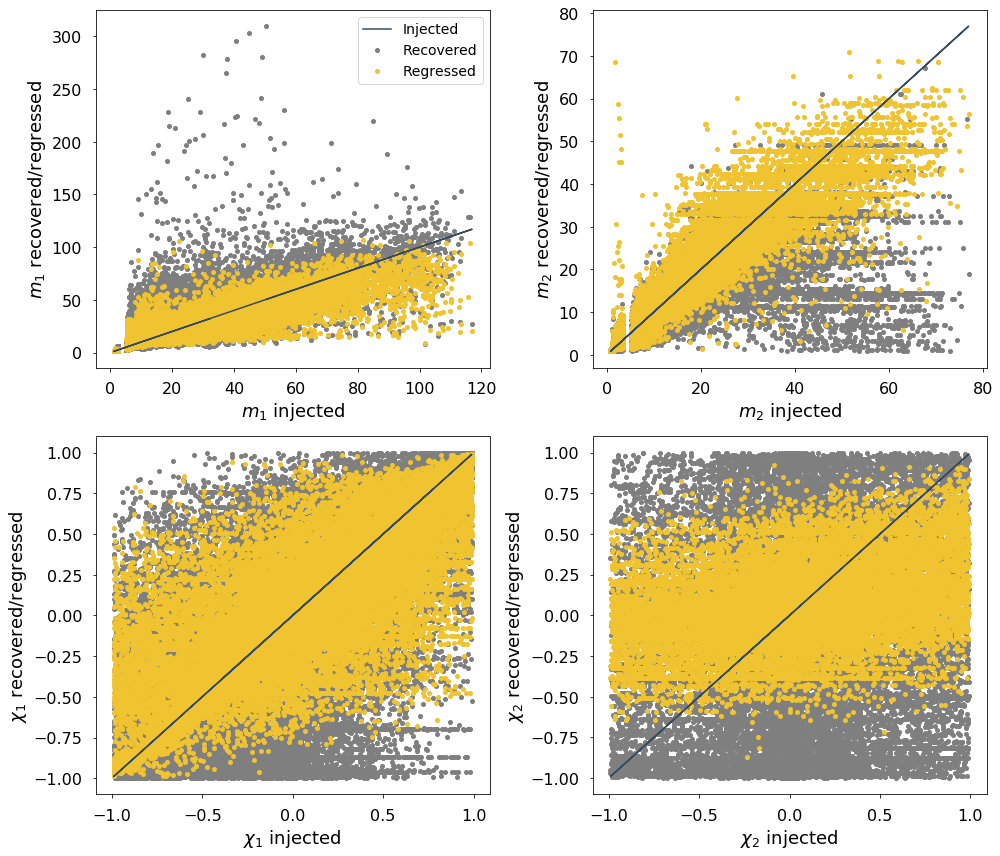

In [16]:
# Initialize plot
f, ax = plt.subplots(2, 2, figsize=(14, 12))
ax[0,0].tick_params(axis='both', which='major', labelsize=16, pad=10)
ax[0,1].tick_params(axis='both', which='major', labelsize=16, pad=10)
ax[1,0].tick_params(axis='both', which='major', labelsize=16, pad=10)
ax[1,1].tick_params(axis='both', which='major', labelsize=16, pad=10)

ax[0,0].plot(ytest_masses[:,0], ytest_masses[:,0], '-', markersize=4, color=color_cycle[0], zorder=-1, label='Injected')
ax[0,0].plot(ytest_masses[:,0], xtest_masses[:,0], 'o', markersize=4, color=color_cycle[9], zorder=-3, label='Recovered')
ax[0,0].plot(ytest_masses[:,0], predicted_masses[:,0], 'o', markersize=4, color=color_cycle[6], zorder=-2, label='Regressed')   

ax[0,0].set_xlabel(r'$m_1$ injected', fontsize=18)
ax[0,0].set_ylabel(r'$m_1$ recovered/regressed', fontsize=18)
ax[0,0].legend(fontsize=14)

ax[0,1].plot(ytest_masses[:,1], ytest_masses[:,1], '-', markersize=4, color=color_cycle[0], zorder=-1)
ax[0,1].plot(ytest_masses[:,1], xtest_masses[:,1], 'o', markersize=4, color=color_cycle[9], zorder=-3)
ax[0,1].plot(ytest_masses[:,1], predicted_masses[:,1], 'o', markersize=4, color=color_cycle[6], zorder=-2)   

ax[0,1].set_xlabel(r'$m_2$ injected', fontsize=18)
ax[0,1].set_ylabel(r'$m_2$ recovered/regressed', fontsize=18)


ax[1,0].plot(ytest_spins[:,0], ytest_spins[:,0], '-', markersize=4, color=color_cycle[0], zorder=-1)
ax[1,0].plot(ytest_spins[:,0], xtest_spins[:,0], 'o', markersize=4, color=color_cycle[9], zorder=-3)
ax[1,0].plot(ytest_spins[:,0], predicted_spins[:,0], 'o', markersize=4, color=color_cycle[6], zorder=-2)

ax[1,0].set_xlabel(r'$\chi_1$ injected ', fontsize=18)
ax[1,0].set_ylabel(r'$\chi_1$ recovered/regressed', fontsize=18)

ax[1,1].plot(ytest_spins[:,1], ytest_spins[:,1], '-', markersize=4, color=color_cycle[0], zorder=-1)
ax[1,1].plot(ytest_spins[:,1], xtest_spins[:,1], 'o', markersize=4, color=color_cycle[9], zorder=-3)
ax[1,1].plot(ytest_spins[:,1], predicted_spins[:,1], 'o', markersize=4, color=color_cycle[6], zorder=-2)

ax[1,1].set_xlabel(r'$\chi_2$ injected ', fontsize=18)
ax[1,1].set_ylabel(r'$\chi_2$ recovered/regressed', fontsize=18)

plt.tight_layout()
#outfile = '/Users/Lorena/ML_IPAM/IPAM2021_ML/papers/regression/figs/m_chi_comparisons.png'
#plt.savefig(outfile, bbox_inches="tight")

#outfile = '/Users/Lorena/ML_IPAM/IPAM2021_ML/papers/regression/figs/m_chi_comparisons.pdf'
#plt.savefig(outfile, bbox_inches="tight")
plt.show()

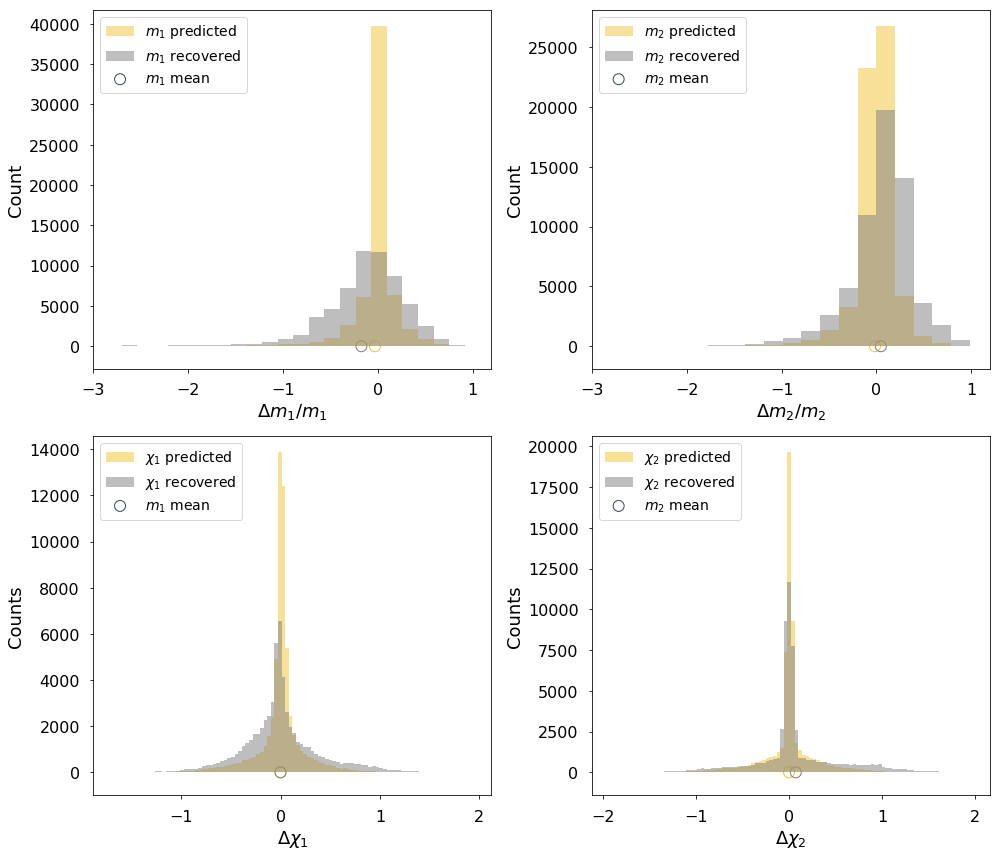

In [17]:
fig, axis = plt.subplots(2,2, figsize=(14,12))

combined_epsilons = [rel_err_M[:,0], rec_rel_err_M[:,0]]
hist, bins, _ = axis[0,0].hist(combined_epsilons, 100)
axis[0,0].clear()
axis[0,0].set_xlabel(r'$\Delta m_1 / m_1$', fontsize=18)
axis[0,0].set_ylabel(r'Count', fontsize=18)
axis[0,0].tick_params(axis='both', which='major', labelsize=16, pad=10)
styles = ['-','-']
labels = ['$m_1$ predicted','$m_1$ recovered']
for_printing = ['m1 predicted','m1 recovered']
color = [color_cycle[6], color_cycle[9]]

for i in range(len(combined_epsilons)):
    axis[0,0].hist(combined_epsilons[i], bins=bins, label=labels[i], ls=styles[i],facecolor=color[i], alpha=0.5)
    point = axis[0,0].scatter(x=np.mean(combined_epsilons[i]), y=0, s=120, facecolors='none', edgecolors=color[i])
    #print('The mean error of', for_printing[i] , 'is: ',np.mean(combined_epsilons[i]))
    point.set_clip_on(False)

axis[0,0].scatter(x=[None],y=0, s=120, facecolors='none', color=color_cycle[0], label='$m_1$ mean')
axis[0,0].legend(ncol = 1, loc="upper left", fontsize=14)

###################

combined_epsilons = [rel_err_M[:,1], rec_rel_err_M[:,1]]

hist, bins, _ = axis[0,1].hist(combined_epsilons, 200)
axis[0,1].clear()
axis[0,1].set_xlabel(r'$\Delta m_2 / m_2$', fontsize=18)
axis[0,1].set_ylabel(r'Count', fontsize=18)
axis[0,1].tick_params(axis='both', which='major', labelsize=16, pad=10)
styles = ['-','-']
labels = ['$m_2$ predicted','$m_2$ recovered']
for_printing = ['m2 predicted','m2 recovered']
color = [color_cycle[6], color_cycle[9]]

for i in range(len(combined_epsilons)):
    axis[0,1].hist(combined_epsilons[i], bins=bins, label=labels[i], ls=styles[i],facecolor=color[i], alpha=0.5)
    point = axis[0,1].scatter(x=np.mean(combined_epsilons[i]), y=0, s=120, facecolors='none', edgecolors=color[i])
    #print('The mean error of', for_printing[i] , 'is: ',np.mean(combined_epsilons[i]))
    point.set_clip_on(False)

axis[0,1].scatter(x=[None],y=0, s=120, facecolors='none', color=color_cycle[0], label='$m_2$ mean')
axis[0,1].legend(ncol = 1, loc="upper left", fontsize=14)

###################

combined_epsilons = [diff_S[:,0], rec_diff_S[:,0]]

hist, bins, _ = axis[1,0].hist(combined_epsilons, 100)
axis[1,0].clear()
axis[1,0].set_xlabel(r'$\Delta \chi_1$', fontsize=18)
axis[1,0].set_ylabel(r'Counts', fontsize=18)
axis[1,0].tick_params(axis='both', which='major', labelsize=16, pad=10)
styles = ['-','-']
labels = ['$\chi_1$ predicted','$\chi_1$ recovered']
for_printing = ['spin1 predicted','spin1 recovered']

color = [color_cycle[6], color_cycle[9]]
for i in range(len(combined_epsilons)):
    axis[1,0].hist(combined_epsilons[i], bins=bins, label=labels[i], ls=styles[i],facecolor=color[i], alpha=0.5)
    point = axis[1,0].scatter(x=np.mean(combined_epsilons[i]), y=0, s=120, facecolors='none', edgecolors=color[i])
    #print('The mean error of', for_printing[i] , 'is: ',np.mean(combined_epsilons[i]))
    point.set_clip_on(False)

axis[1,0].scatter(x=[None],y=0, s=120, facecolors='none', color=color_cycle[0], label='$m_1$ mean')
axis[1,0].legend(ncol = 1, loc="upper left", fontsize=14)

###################

combined_epsilons = [diff_S[:,1], rec_diff_S[:,1]]

hist, bins, _ = axis[1,1].hist(combined_epsilons, 100)
axis[1,1].clear()
axis[1,1].set_xlabel(r'$\Delta \chi_2$', fontsize=18)
axis[1,1].set_ylabel(r'Counts', fontsize=18)
axis[1,1].tick_params(axis='both', which='major', labelsize=16, pad=10)
styles = ['-','-']
labels = ['$\chi_2$ predicted','$\chi_2$ recovered']
for_printing = ['spin2 predicted','spin2 recovered']

color = [color_cycle[6], color_cycle[9]]
for i in range(len(combined_epsilons)):
    axis[1,1].hist(combined_epsilons[i], bins=bins, label=labels[i], ls=styles[i],facecolor=color[i], alpha=0.5)
    point = axis[1,1].scatter(x=np.mean(combined_epsilons[i]), y=0, s=120, facecolors='none', edgecolors=color[i])
    #print('The mean error of', for_printing[i] , 'is: ',np.mean(combined_epsilons[i]))
    point.set_clip_on(False)

axis[1,1].scatter(x=[None],y=0, s=120, facecolors='none', color=color_cycle[0], label='$m_2$ mean')    
axis[1,1].legend(ncol = 1, loc="upper left", fontsize=14)

axis[0,0].set_xlim((-3,1.2))
axis[0,1].set_xlim((-3,1.2))

plt.tight_layout()
#outfile = '/Users/Lorena/ML_IPAM/IPAM2021_ML/papers/regression/figs/m1_m2_chi_error_analysis_wboxes.png'
#plt.savefig(outfile, bbox_inches="tight")

#outfile = '/Users/Lorena/ML_IPAM/IPAM2021_ML/papers/regression/figs/m1_m2_chi_error_analysis_wboxes.pdf'
#plt.savefig(outfile, bbox_inches="tight")
plt.show()

## Table Values

In [ ]:
def chirpMass(m1, m2):
    return (m1*m2)**(3/5)/(m1+m2)**(1/5)

def findSecondMassFromMc(Mc, m):
    """
    Find analytically one mass from Mc and the other mass.
    Mc and m can be vectors
    """
    if np.any(Mc<0) or np.any(m<0):
        print('negative masses in input!')
        sys.exit()
    Mc5 = Mc**5
    arg = 81*m**5-12*Mc5
    #mysqrt = np.where(arg<0, 1j*np.sqrt(-arg), np.sqrt(arg))
    mysqrt_abs = np.sqrt(np.abs(arg))
    mysqrt = np.where(arg<0, 1j*mysqrt_abs, mysqrt_abs)
    Mc5by3 = Mc5**(1/3)
    croot  = (9*m**(5/2)+mysqrt)**(1/3)
    num    = Mc5by3*(2*3**(1/3)*Mc5by3+2**(1/3)*croot**2)
    den    = (6**(2/3)*m**(3/2)*croot)
    out    = num/den
    if np.any(np.abs(out.imag)>1e-14):
        print('Warning! Imaginary part bigger than 1e-14: ', max(np.abs(out.imag)) )
    return out.real

In [ ]:
print(np.mean(rec_abs_diff_M[:,0]), np.mean(rec_abs_rel_err_M[:,0]), np.std(rec_abs_rel_err_M[:,0]))
print(np.mean(abs_diff_M[:,0]), np.mean(abs_rel_err_M[:,0]), np.std(abs_rel_err_M[:,0]))

In [ ]:
print(np.mean(rec_abs_diff_M[:,1]), np.mean(rec_abs_rel_err_M[:,1]), np.std(rec_abs_rel_err_M[:,1]))
print(np.mean(abs_diff_M[:,1]), np.mean(abs_rel_err_M[:,1]), np.std(abs_rel_err_M[:,1]))

In [ ]:
print(np.mean(rec_abs_diff_S[:,0]), np.std(rec_abs_diff_S[:,0]))
print(np.mean(abs_diff_S[:,0]), np.std(abs_diff_S[:,0]))

In [ ]:
print(np.mean(rec_abs_diff_S[:,1]), np.std(rec_abs_diff_S[:,1]))
print(np.mean(abs_diff_S[:,1]), np.std(abs_diff_S[:,1]))

In [ ]:
Mc_inj = chirpMass(ytest_masses[:,0], ytest_masses[:,1])
Mc_rec = chirpMass(xtest_masses[:,0], xtest_masses[:,1])
Mc_pred = chirpMass(predicted_masses[:,0], predicted_masses[:,1])

print(np.mean(np.abs(Mc_inj-Mc_rec)), np.mean(np.abs((Mc_inj-Mc_rec)/Mc_inj)), np.std(np.abs((Mc_inj-Mc_rec)/Mc_inj)))
print(np.mean(np.abs(Mc_inj-Mc_pred)), np.mean(np.abs((Mc_inj-Mc_pred)/Mc_inj)), np.std(np.abs((Mc_inj-Mc_pred)/Mc_inj)))

In [ ]:
ytrain = extract_data('/Users/Lorena/ML_IPAM/IPAM2021_ML/algo/GPR/gpytorch/notebooks/complete_ytrain_Mc.csv')
xtrain = extract_data('/Users/Lorena/ML_IPAM/IPAM2021_ML/algo/GPR/gpytorch/notebooks/complete_xtrain_Mc.csv')
ytest = extract_data('/Users/Lorena/ML_IPAM/IPAM2021_ML/algo/GPR/gpytorch/notebooks/complete_ytest_Mc.csv')
xtest = extract_data('/Users/Lorena/ML_IPAM/IPAM2021_ML/algo/GPR/gpytorch/notebooks/complete_xtest_Mc.csv')
predicted_data = extract_data('please_work_Mc.csv')

In [ ]:
print(np.mean(rec_abs_diff_M[:,0]), np.mean(rec_abs_rel_err_M[:,0]), np.std(rec_abs_rel_err_M[:,0]))
print(np.mean(abs_diff_M[:,0]), np.mean(abs_rel_err_M[:,0]), np.std(abs_rel_err_M[:,0]))

In [ ]:
print(np.mean(rec_abs_diff_M[:,1]), np.mean(rec_abs_rel_err_M[:,1]), np.std(rec_abs_rel_err_M[:,1]))
print(np.mean(abs_diff_M[:,1]), np.mean(abs_rel_err_M[:,1]), np.std(abs_rel_err_M[:,1]))

In [ ]:
print(np.mean(rec_abs_diff_S[:,0]), np.std(rec_abs_diff_S[:,0]))
print(np.mean(abs_diff_S[:,0]), np.std(abs_diff_S[:,0]))

In [ ]:
print(np.mean(rec_abs_diff_S[:,1]), np.std(rec_abs_diff_S[:,1]))
print(np.mean(abs_diff_S[:,1]), np.std(abs_diff_S[:,1]))

In [ ]:
findSecondMassFromMc(Mc, m)

In [ ]:
m2_inj = findSecondMassFromMc(ytest_masses[:,1], ytest_masses[:,0])
m2_rec = findSecondMassFromMc(xtest_masses[:,1], xtest_masses[:,0])
m2_pred = findSecondMassFromMc(predicted_masses[:,1], predicted_masses[:,0])

print(np.mean(np.abs(m2_inj-m2_rec)), np.mean(np.abs((m2_inj-m2_rec)/m2_inj)), np.std(np.abs((m2_inj-m2_rec)/m2_inj)))
print(np.mean(np.abs(m2_inj-m2_pred)), np.mean(np.abs((m2_inj-m2_pred)/m2_inj)), np.std(np.abs((m2_inj-m2_pred)/m2_inj)))

In [ ]:
# Initialize plot
f, ax = plt.subplots(1, 2, figsize=(16, 6))

#True values
ax[0].plot(ytest_masses[:,0], ytest_masses[:,0], 'r-', label='True value')     
ax[1].plot(ytest_masses[:,1], ytest_masses[:,1], 'r-', label='True value') 

#Recovered
ax[0].plot(ytest_masses[:,0], xtest_masses[:,0], 'b*', zorder=-1, label='Recovered')
ax[1].plot(ytest_masses[:,1], xtest_masses[:,1], 'b*', zorder=-1, label='Recovered')

#Predicted
ax[0].plot(ytest_masses[:,0], predicted_masses[:,0], 'go', zorder=-1, label='Predicted')       
ax[1].plot(ytest_masses[:,1], predicted_masses[:,1], 'go', zorder=-1, label='Predicted') 

ax[0].set_xlabel(r'$m_1$ injected', fontsize=14)
ax[0].set_ylabel(r'$m_1$ GSTLAL', fontsize=14)
ax[0].legend(fontsize=12)

ax[1].set_xlabel(r'$m_2$ injected', fontsize=14)
ax[1].set_ylabel(r'$m_2$ GSTLAL', fontsize=14)
ax[1].legend(fontsize=12)

plt.tight_layout()
outfile = '../figs/m1_m2_chi_comparisons.png'
plt.savefig(outfile, bbox_inches="tight")
plt.show()

In [ ]:
# Initialize plot
f, ax = plt.subplots(1, 2, figsize=(16, 6))

#True values
ax[0].plot(ytest_spins[:,0], ytest_spins[:,0], 'r-', label='True value')     
ax[1].plot(ytest_spins[:,1], ytest_spins[:,1], 'r-', label='True value') 

#Recovered
ax[0].plot(ytest_spins[:,0], xtest_spins[:,0], 'b*', zorder=-1, label='Recovered')
ax[1].plot(ytest_spins[:,1], xtest_spins[:,1], 'b*', zorder=-1, label='Recovered')

#Predicted
ax[0].plot(ytest_spins[:,0], predicted_spins[:,0], 'go', zorder=-1, label='Predicted')       
ax[1].plot(ytest_spins[:,1], predicted_spins[:,1], 'go', zorder=-1, label='Predicted') 

ax[0].set_xlabel(r'$\chi_1$ injected', fontsize=14)
ax[0].set_ylabel(r'$\chi_1$ GSTLAL', fontsize=14)
ax[0].legend(fontsize=12)

ax[1].set_xlabel(r'$\chi_2$ injected', fontsize=14)
ax[1].set_ylabel(r'$\chi_2$ GSTLAL', fontsize=14)
ax[1].legend(fontsize=12)

plt.tight_layout()
outfile = '../figs/m_chi1_chi2_comparisons.png'
plt.savefig(outfile, bbox_inches="tight")
plt.show()

In [ ]:
# Initialize plot
f, ax = plt.subplots(1, 2, figsize=(16, 6))

#Recovered
ax[0].plot(xtest_masses[:,0], rec_rel_err_M[:,0], 'b*', label='Recovered')
ax[1].plot(xtest_masses[:,1], rec_rel_err_M[:,1], 'b*', label='Recovered')

#Predicted
ax[0].plot(xtest_masses[:,0], rel_err_M[:,0], 'g*', label='Predicted')
ax[1].plot(xtest_masses[:,1], rel_err_M[:,1], 'g*', label='Predicted')


#Linear fits
z = np.polyfit(xtest_masses[:,0], rec_rel_err_M[:,0], 1)
p = np.poly1d(z)
ax[0].plot(xtest_masses[:,0], p(xtest_masses[:,0]), 'm', label='Recovered fit')

z = np.polyfit(xtest_masses[:,0], rel_err_M[:,0], 1)
p = np.poly1d(z)
ax[0].plot(xtest_masses[:,0], p(xtest_masses[:,0]), 'r', label='Predicted fit')


z = np.polyfit(xtest_masses[:,1], rec_rel_err_M[:,1], 1)
p = np.poly1d(z)
ax[1].plot(xtest_masses[:,1], p(xtest_masses[:,1]), 'm', label='Recovered fit')

z = np.polyfit(xtest_masses[:,1], rel_err_M[:,1], 1)
p = np.poly1d(z)
ax[1].plot(xtest_masses[:,1], p(xtest_masses[:,1]), 'r', label='Predicted fit')


ax[0].tick_params(axis='both', which='major', direction='inout', top=True, right=True, labelsize=14, pad=10)
ax[1].tick_params(axis='both', which='major', direction='inout', top=True, right=True, labelsize=14, pad=10)
ax[0].set_xlabel(r'$m_1$ GSTLAL', fontsize=14)
ax[0].set_ylabel(r'$(m_1^{\mathrm{inj}}-m_1^{\mathrm{X}})/m_1^{\mathrm{inj}}$', fontsize=14)
ax[0].legend(fontsize=12)

ax[1].set_xlabel(r'$m_2$ GSTLAL', fontsize=14)
ax[1].set_ylabel(r'$(m_2^{\mathrm{inj}}-m_2^{\mathrm{X}})/m_2^{\mathrm{inj}}$', fontsize=14)
ax[1].legend(fontsize=12)

plt.tight_layout()
outfile = '../figs/m1_m2_chi_errors_and_fits.png'
plt.savefig(outfile, bbox_inches="tight")
plt.show()

In [ ]:
# Initialize plot
f, ax = plt.subplots(1, 2, figsize=(16, 6))

#Recovered
ax[0].plot(xtest_spins[:,0], rec_diff_S[:,0], 'b*', label='Recovered')
ax[1].plot(xtest_spins[:,1], rec_diff_S[:,1], 'b*', label='Recovered')

#Recovered
ax[0].plot(xtest_spins[:,0], diff_S[:,0], 'g*', label='Predicted')
ax[1].plot(xtest_spins[:,1], diff_S[:,1], 'g*', label='Predicted')

#Linear fits
z = np.polyfit(xtest_spins[:,0], rec_diff_S[:,0], 1)
p = np.poly1d(z)
ax[0].plot(xtest_spins[:,0], p(xtest_spins[:,0]), 'm', label='Recovered fit')

z = np.polyfit(xtest_spins[:,0], diff_S[:,0], 1)
p = np.poly1d(z)
ax[0].plot(xtest_spins[:,0], p(xtest_spins[:,0]), 'r', label='Predicted fit')


z = np.polyfit(xtest_spins[:,1], rec_diff_S[:,1], 1)
p = np.poly1d(z)
ax[1].plot(xtest_spins[:,1], p(xtest_spins[:,1]), 'm', label='Recovered fit')

z = np.polyfit(xtest_spins[:,1], diff_S[:,1], 1)
p = np.poly1d(z)
ax[1].plot(xtest_spins[:,1], p(xtest_spins[:,1]), 'r', label='Predicted fit')


ax[0].tick_params(axis='both', which='major', direction='inout', top=True, right=True, labelsize=14, pad=10)
ax[1].tick_params(axis='both', which='major', direction='inout', top=True, right=True, labelsize=14, pad=10)
ax[0].set_xlabel(r'$\chi_1$ GSTLAL', fontsize=14)
ax[0].set_ylabel(r'$(\chi_1^{\mathrm{inj}}-\chi_1^{\mathrm{X}})$', fontsize=14)
ax[0].legend(fontsize=12)
ax[1].set_xlabel(r'$\chi_2$ GSTLAL', fontsize=14)
ax[1].set_ylabel(r'$(\chi_2^{\mathrm{inj}}-\chi_2^{\mathrm{X}})$', fontsize=14)
ax[1].legend(fontsize=12)

plt.tight_layout()
outfile = '../figs/m_chi1_chi2_errors_and_fits.png'
plt.savefig(outfile, bbox_inches="tight")
plt.show()

In [ ]:
fig, axis = plt.subplots(1,2, figsize=(15,5.25))

combined_epsilons = [rel_err_M[:,0], rec_rel_err_M[:,0]]
hist, bins, _ = axis[0].hist(combined_epsilons, 60)
axis[0].clear()
axis[0].set_xlabel(r'$\left(y_{\mathrm{inj}}-y_{\mathrm{X}}\right)/y_{\mathrm{inj}}$', fontsize=14)
axis[0].set_ylabel(r'Count', fontsize=14)
axis[0].tick_params(axis='both', which='major', labelsize=14, pad=10)
styles = ['-','-']
labels = ['$m_1$ predicted','$m_1$ recovered']
for_printing = ['m1 predicted','m1 recovered']
color = ['blue','gray']

for i in range(len(combined_epsilons)):
    axis[0].hist(combined_epsilons[i], bins=bins, label=labels[i], ls=styles[i],facecolor=color[i], alpha=0.5)
    point = axis[0].scatter(x=np.mean(combined_epsilons[i]), y=0, s=120, facecolors='none', edgecolors=color[i])
    print('The mean error of', for_printing[i] , 'is: ',np.mean(combined_epsilons[i]))
    point.set_clip_on(False)

axis[0].scatter(x=[None],y=0, s=120, facecolors='none', color=color_cycle[0], label='$m_1$ mean')
axis[0].legend(ncol = 1, loc="upper left", fontsize=12)

###################

combined_epsilons = [rel_err_M[:,1], rec_rel_err_M[:,1]]

hist, bins, _ = axis[1].hist(combined_epsilons, 60)
axis[1].clear()
axis[1].set_xlabel(r'$\left(y_{\mathrm{inj}}-y_{\mathrm{X}}\right)/y_{\mathrm{inj}}$', fontsize=14)
axis[1].set_ylabel(r'Count', fontsize=14)
axis[1].tick_params(axis='both', which='major', labelsize=14, pad=10)
styles = ['-','-']
labels = ['$m_2$ predicted','$m_2$ recovered']
for_printing = ['m2 predicted','m2 recovered']
color = ['orange','gray']

for i in range(len(combined_epsilons)):
    axis[1].hist(combined_epsilons[i], bins=bins, label=labels[i], ls=styles[i],facecolor=color[i], alpha=0.5)
    point = axis[1].scatter(x=np.mean(combined_epsilons[i]), y=0, s=120, facecolors='none', edgecolors=color[i])
    print('The mean error of', for_printing[i] , 'is: ',np.mean(combined_epsilons[i]))
    point.set_clip_on(False)
    
axis[1].scatter(x=[None],y=0, s=120, facecolors='none', color=color_cycle[0], label='$m_2$ mean')
axis[1].legend(ncol = 1, loc="upper left", fontsize=12)

plt.tight_layout()
outfile = '../figs/m1_m2_chi_error_analysis_wboxes.png'
plt.savefig(outfile, bbox_inches="tight")
plt.show()

In [ ]:
fig, axis = plt.subplots(1,2, figsize=(15,5.25))

combined_epsilons = [rel_err_M[:,0], rec_rel_err_M[:,0]]

hist, bins, _ = axis[0].hist(combined_epsilons, 100)
axis[0].clear()
axis[0].set_xlabel(r'$\left(y_{\mathrm{inj}}-y_{\mathrm{X}}\right)/y_{\mathrm{inj}}$', fontsize=14)
axis[0].set_ylabel(r'Counts', fontsize=14)
axis[0].tick_params(axis='both', which='major', labelsize=14, pad=10)
styles = ['-','-']
labels = ['$m_1$ predicted','$m_1$ recovered']
for_printing = ['m1 predicted','m1 recovered']

color = ['blue','gray']
for i in range(len(combined_epsilons)):
    axis[0].hist(combined_epsilons[i], bins=bins, label=labels[i], ls=styles[i],facecolor=color[i], alpha=0.5)
    point = axis[0].scatter(x=np.mean(combined_epsilons[i]), y=0, s=120, facecolors='none', edgecolors=color[i])
    point.set_clip_on(False)

axis[0].scatter(x=[None],y=0, s=120, facecolors='none', color=color_cycle[0], label='$m_1$ mean')
axis[0].legend(ncol = 1, loc="upper left", fontsize=12)

###################

combined_epsilons = [rel_err_M[:,1], rec_rel_err_M[:,1]]

hist, bins, _ = axis[1].hist(combined_epsilons, 200)
axis[1].clear()
axis[1].set_xlabel(r'$\left(y_{\mathrm{inj}}-y_{\mathrm{X}}\right)/y_{\mathrm{inj}}$', fontsize=14)
axis[1].set_ylabel(r'Counts', fontsize=14)
axis[1].tick_params(axis='both', which='major', labelsize=14, pad=10)
styles = ['-','-']
labels = ['$m_2$ predicted','$m_2$ recovered']
for_printing = ['m2 predicted','m2 recovered']

color = ['orange','gray']
for i in range(len(combined_epsilons)):
    axis[1].hist(combined_epsilons[i], bins=bins, label=labels[i], ls=styles[i],facecolor=color[i], alpha=0.5)
    point = axis[1].scatter(x=np.mean(combined_epsilons[i]), y=0, s=120, facecolors='none', edgecolors=color[i])
    point.set_clip_on(False)
    
axis[1].scatter(x=[None],y=0, s=120, facecolors='none', color=color_cycle[0], label='$m_2$ mean')    
axis[1].legend(ncol = 1, loc="upper left", fontsize=12)

axis[0].set_xlim((-3,1))
axis[1].set_xlim((-3,1.2))
plt.tight_layout()
outfile = '../figs/m1_m2_chi_error_analysis_wboxes.png'
plt.savefig(outfile, bbox_inches="tight")
plt.show()

In [ ]:
fig, axis = plt.subplots(1,2, figsize=(15,5.25))

combined_epsilons = [abs_rel_err_M[:,0], rec_abs_rel_err_M[:,0]]
hist, bins, _ = axis[0].hist(combined_epsilons, 100)
axis[0].clear()
axis[0].set_xlabel(r'$|\left(y_{\mathrm{inj}}-y_{\mathrm{X}}\right)/y_{\mathrm{inj}}|$', fontsize=14)
axis[0].set_ylabel(r'Counts', fontsize=14)
axis[0].tick_params(axis='both', which='major', labelsize=14, pad=10)
styles = ['-','-']
labels = ['$m_1$ predicted','$m_1$ recovered']
for_printing = ['m1 predicted','m1 recovered']

color = ['blue','gray']
for i in range(len(combined_epsilons)):
    axis[0].hist(combined_epsilons[i], bins=bins, label=labels[i], ls=styles[i],facecolor=color[i], alpha=0.5)
    point = axis[0].scatter(x=np.mean(combined_epsilons[i]), y=0, s=120, facecolors='none', edgecolors=color[i])
    print('The mean error of', for_printing[i] , 'is: ',np.mean(combined_epsilons[i]))
    point.set_clip_on(False)

axis[0].scatter(x=[None],y=0, s=120, facecolors='none', color=color_cycle[0], label='$m_1$ mean')
axis[0].legend(ncol = 1, loc="upper right", fontsize=12)

###################

combined_epsilons = [abs_rel_err_M[:,1], rec_abs_rel_err_M[:,1]]
hist, bins, _ = axis[1].hist(combined_epsilons, 300)
axis[1].clear()
axis[1].set_xlabel(r'$|\left(y_{\mathrm{inj}}-y_{\mathrm{X}}\right)/y_{\mathrm{inj}}|$', fontsize=14)
axis[1].set_ylabel(r'Counts', fontsize=14)
axis[1].tick_params(axis='both', which='major', labelsize=14, pad=10)
styles = ['-','-']
labels = ['$m_2$ predicted','$m_2$ recovered']
for_printing = ['m2 predicted','m2 recovered']

color = ['orange','gray']
for i in range(len(combined_epsilons)):
    axis[1].hist(combined_epsilons[i], bins=bins, label=labels[i], ls=styles[i],facecolor=color[i], alpha=0.5)
    point = axis[1].scatter(x=np.mean(combined_epsilons[i]), y=0, s=120, facecolors='none', edgecolors=color[i])
    print('The mean error of', for_printing[i] , 'is: ',np.mean(combined_epsilons[i]))
    point.set_clip_on(False)
    
axis[1].scatter(x=[None],y=0, s=120, facecolors='none', color=color_cycle[0], label='$m_2$ mean')
    
axis[1].legend(ncol = 1, loc="upper right", fontsize=12)
axis[0].set_xlim((0,5))
axis[1].set_xlim((0,4))
outfile = '../figs/m_chi1_chi2_error_analysis_wboxes.png'
plt.savefig(outfile, bbox_inches="tight")
plt.show()

In [ ]:
fig, axis = plt.subplots(1, figsize=(7,6))

combined_epsilons = [abs_rel_err_M[:,0], abs_rel_err_M[:,1]]

hist, bins, _ = axis.hist(combined_epsilons, 20)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
axis.clear()

axis.set_xlabel(r'$|y_{\mathrm{inj}}-y_{\mathrm{pred}}/y_{\mathrm{inj}}|$', fontsize=14)
axis.set_ylabel(r'Counts', fontsize=14)
axis.tick_params(axis='both', which='major', labelsize=14, pad=10)
styles = ['-','-']
labels = ['$m_1$ errors','$m_2$ errors']
for_printing = ['m1 predicted error','m2 predicted error']

color = ['blue', 'orange']
for i in range(len(combined_epsilons)):
    axis.hist(combined_epsilons[i], bins=logbins, histtype=u'step', label=labels[i], color=color_cycle[i+1], ls=styles[i])
    point = axis.scatter(x=np.mean(combined_epsilons[i]), y=0, s=120, facecolors='none', edgecolors=color_cycle[i+1])
    print('The mean error of', for_printing[i] , 'is: ',np.mean(combined_epsilons[i]))
    point.set_clip_on(False)

axis.set_xscale('log')
axis.legend(ncol = 1, loc="upper left", fontsize=12)
plt.show()

In [ ]:
fig, axis = plt.subplots(1,2, figsize=(15,5.25))

combined_epsilons = [diff_S[:,0], rec_diff_S[:,0]]

hist, bins, _ = axis[0].hist(combined_epsilons, 30)
axis[0].clear()
axis[0].set_xlabel(r'$\left(y_{\mathrm{inj}}-y_{\mathrm{X}}\right)$', fontsize=14)
axis[0].set_ylabel(r'Counts', fontsize=14)
axis[0].tick_params(axis='both', which='major', labelsize=14, pad=10)
styles = ['-','-']
labels = ['$\chi_1$ predicted','$\chi_1$ recovered']
for_printing = ['spin1 predicted','spin1 recovered']

color = ['blue','gray']
for i in range(len(combined_epsilons)):
    axis[0].hist(combined_epsilons[i], bins=bins, label=labels[i], ls=styles[i],facecolor=color[i], alpha=0.5)
    point = axis[0].scatter(x=np.mean(combined_epsilons[i]), y=0, s=120, facecolors='none', edgecolors=color[i])
    print('The mean error of', for_printing[i] , 'is: ',np.mean(combined_epsilons[i]))
    point.set_clip_on(False)

axis[0].scatter(x=[None],y=0, s=120, facecolors='none', color=color_cycle[0], label='$m_1$ mean')
axis[0].legend(ncol = 1, loc="upper left", fontsize=12)

###################

combined_epsilons = [diff_S[:,1], rec_diff_S[:,1]]

hist, bins, _ = axis[1].hist(combined_epsilons, 30)
axis[1].clear()
axis[1].set_xlabel(r'$\left(y_{\mathrm{inj}}-y_{\mathrm{X}}\right)$', fontsize=14)
axis[1].set_ylabel(r'Counts', fontsize=14)
axis[1].tick_params(axis='both', which='major', labelsize=14, pad=10)
styles = ['-','-']
labels = ['$\chi_2$ predicted','$\chi_2$ recovered']
for_printing = ['spin2 predicted','spin2 recovered']

color = ['orange','gray']
for i in range(len(combined_epsilons)):
    axis[1].hist(combined_epsilons[i], bins=bins, label=labels[i], ls=styles[i],facecolor=color[i], alpha=0.5)
    point = axis[1].scatter(x=np.mean(combined_epsilons[i]), y=0, s=120, facecolors='none', edgecolors=color[i])
    print('The mean error of', for_printing[i] , 'is: ',np.mean(combined_epsilons[i]))
    point.set_clip_on(False)
    
axis[1].scatter(x=[None],y=0, s=120, facecolors='none', color=color_cycle[0], label='$m_2$ mean')    
axis[1].legend(ncol = 1, loc="upper left", fontsize=12)

plt.tight_layout()
outfile = '../figs/m_chi1_chi2_error_analysis_wboxes.png'
plt.savefig(outfile, bbox_inches="tight")
plt.show()

In [ ]:
fig, axis = plt.subplots(1,2, figsize=(15,5.25))

combined_epsilons = [abs_diff_S[:,0], rec_abs_diff_S[:,0]]

hist, bins, _ = axis[0].hist(combined_epsilons, 30)
axis[0].clear()
axis[0].set_xlabel(r'$|y_{\mathrm{inj}}-y_{\mathrm{pred}}|$', fontsize=14)
axis[0].set_ylabel(r'Counts', fontsize=14)
axis[0].tick_params(axis='both', which='major', labelsize=14, pad=10)
styles = ['-','-']
labels = ['$\chi_1$ predicted','$\chi_1$ recovered']
for_printing = ['spin1 predicted','spin1 recovered']

color = ['blue','gray']
for i in range(len(combined_epsilons)):
    axis[0].hist(combined_epsilons[i], bins=bins, label=labels[i], ls=styles[i],facecolor=color[i], alpha=0.5)
    point = axis[0].scatter(x=np.mean(combined_epsilons[i]), y=0, s=120, facecolors='none', edgecolors=color[i])
    print('The mean error of', for_printing[i] , 'is: ',np.mean(combined_epsilons[i]))
    point.set_clip_on(False)

axis[0].scatter(x=[None],y=0, s=120, facecolors='none', color=color_cycle[0], label='$m_1$ mean')
axis[0].legend(ncol = 1, loc="upper right", fontsize=12)

###################

combined_epsilons = [abs_diff_S[:,1], rec_abs_diff_S[:,1]]

hist, bins, _ = axis[1].hist(combined_epsilons, 30)
axis[1].clear()
axis[1].set_xlabel(r'$|y_{\mathrm{inj}}-y_{\mathrm{pred}}|$', fontsize=14)
axis[1].set_ylabel(r'Counts', fontsize=14)
axis[1].tick_params(axis='both', which='major', labelsize=14, pad=10)
styles = ['-','-']
labels = ['$\chi_2$ predicted','$\chi_2$ recovered']
for_printing = ['spin2 predicted','spin2 recovered']

color = ['orange','gray']
for i in range(len(combined_epsilons)):
    axis[1].hist(combined_epsilons[i], bins=bins, label=labels[i], ls=styles[i],facecolor=color[i], alpha=0.5)
    point = axis[1].scatter(x=np.mean(combined_epsilons[i]), y=0, s=120, facecolors='none', edgecolors=color[i])
    print('The mean error of', for_printing[i] , 'is: ',np.mean(combined_epsilons[i]))
    point.set_clip_on(False)
    
axis[1].scatter(x=[None],y=0, s=120, facecolors='none', color=color_cycle[0], label='$m_2$ mean')    
axis[1].legend(ncol = 1, loc="upper right", fontsize=12)
plt.tight_layout()
plt.show()